In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv('C:/Users/white/OneDrive/Documents/Internship/archive2/cereal.csv')

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [8]:
# more information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [10]:
# Removing negative value from column "sugars" and "potass"

df = df[(df['sugars'] > 0) & (df['potass'] > 0)]

print(df)



                       name mfr type  calories  protein  fat  sodium  fiber  \
0                 100% Bran   N    C        70        4    1     130   10.0   
1         100% Natural Bran   Q    C       120        3    5      15    2.0   
2                  All-Bran   K    C        70        4    1     260    9.0   
5   Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   
6               Apple Jacks   K    C       110        2    0     125    1.0   
..                      ...  ..  ...       ...      ...  ...     ...    ...   
72                  Triples   G    C       110        2    1     250    0.0   
73                     Trix   G    C       110        1    1     140    0.0   
74               Wheat Chex   R    C       100        3    1     230    3.0   
75                 Wheaties   G    C       100        3    1     200    3.0   
76      Wheaties Honey Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  vitamins  shelf  weight 

In [11]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,110.441176,2.514706,1.088235,174.632353,2.000000,14.764706,7.735294,96.176471,31.250000,2.235294,1.050735,0.822941,39.743161
std,15.875808,1.085765,1.003506,73.053426,2.029631,3.838601,3.972358,67.054876,21.758083,0.812544,0.127224,0.238497,10.846888
min,70.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,20.000000,0.000000,1.000000,1.000000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,140.000000,0.000000,12.000000,3.750000,40.000000,25.000000,2.000000,1.000000,0.670000,31.384493
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.500000,90.000000,25.000000,2.000000,1.000000,0.750000,39.250156
75%,120.000000,3.000000,2.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,46.718044
max,160.000000,6.000000,5.000000,320.000000,10.000000,23.000000,15.000000,320.000000,100.000000,3.000000,1.500000,1.500000,68.402973


In [13]:
# Are there any missing values in the dataset?
null_values=df.isna().sum()
print(null_values)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [14]:
#Checking for duplicate values
print(df.duplicated().sum())


0


In [16]:
# creating a dictionary to map the manufacturer codes to their full names
manufacturer_mapping = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

# replacing the manufacturer codes with their full names in the 'mfr' column
df['mfr'] = df['mfr'].map(manufacturer_mapping)

In [17]:
unique_manufacturers = df['mfr'].unique()
print("Unique manufacturers:", unique_manufacturers)

Unique manufacturers: ['Nabisco' 'Quaker Oats' 'Kelloggs' 'General Mills' 'Ralston Purina'
 'Post' 'American Home Food Products']


In [18]:
# exploring the distribution of cereal types (cold vs hot)
cereal_type_counts = df['type'].value_counts()
print("Cereal Type Distribution:\n", cereal_type_counts)

Cereal Type Distribution:
 C    67
H     1
Name: type, dtype: int64


In [22]:
# investigating the summary statistics of numerical features
numerical_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups']
numerical_stats = df[numerical_columns].describe()

print(numerical_stats)

         calories    protein        fat      sodium      fiber      carbo  \
count   68.000000  68.000000  68.000000   68.000000  68.000000  68.000000   
mean   110.441176   2.514706   1.088235  174.632353   2.000000  14.764706   
std     15.875808   1.085765   1.003506   73.053426   2.029631   3.838601   
min     70.000000   1.000000   0.000000    0.000000   0.000000   5.000000   
25%    100.000000   2.000000   0.000000  140.000000   0.000000  12.000000   
50%    110.000000   2.500000   1.000000  180.000000   1.750000  14.500000   
75%    120.000000   3.000000   2.000000  220.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  10.000000  23.000000   

          sugars      potass    vitamins     weight       cups  
count  68.000000   68.000000   68.000000  68.000000  68.000000  
mean    7.735294   96.176471   31.250000   1.050735   0.822941  
std     3.972358   67.054876   21.758083   0.127224   0.238497  
min     1.000000   20.000000    0.000000   1.0

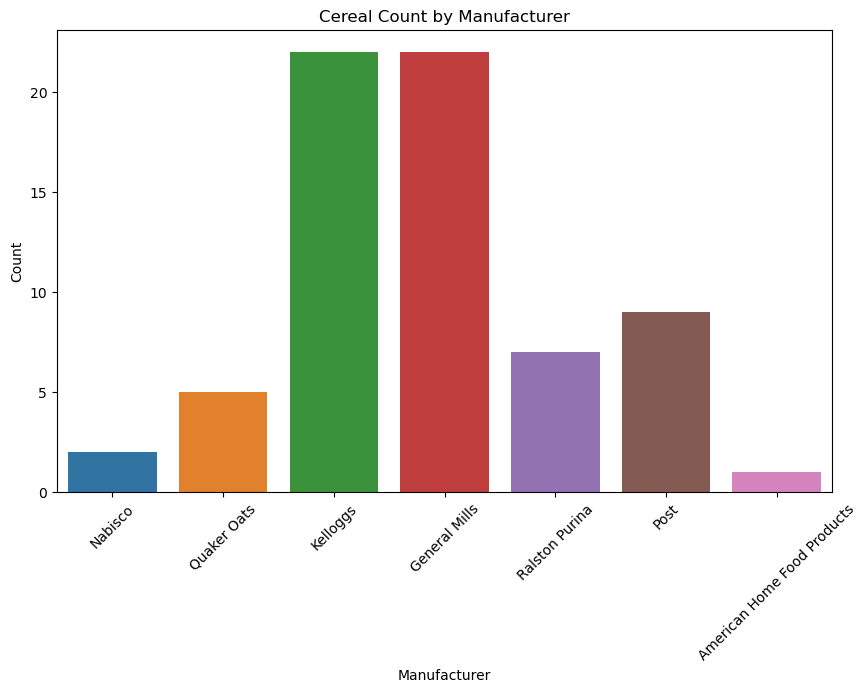

In [27]:
# creating a bar chart showing the count of cereals by manufacturer (Deliverable)
# bar chart showing the count of cereals by manufacturer
plt.figure(figsize=(10, 6))
sns.countplot(x='mfr', data=df)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Cereal Count by Manufacturer')
plt.xticks(rotation=45)
plt.show()

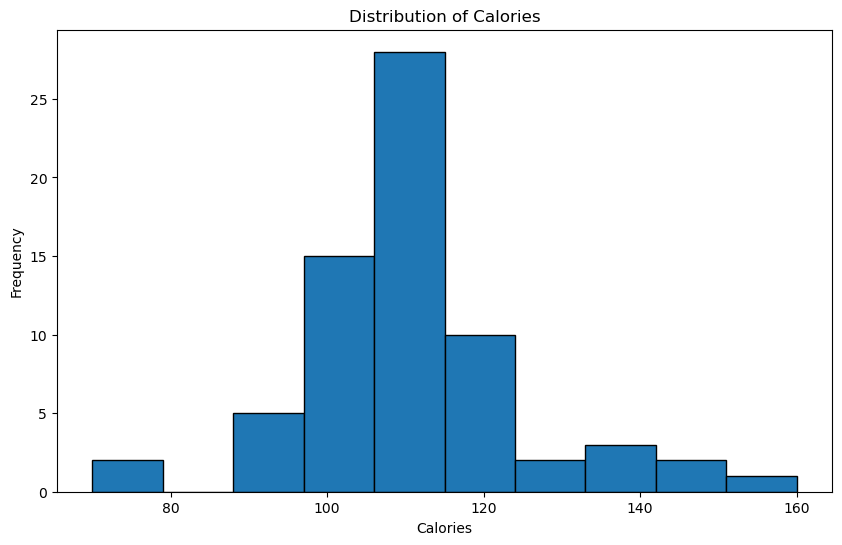

In [28]:

# Histogram for the distribution of calories
plt.figure(figsize=(10, 6))
plt.hist(df['calories'], bins=10, edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

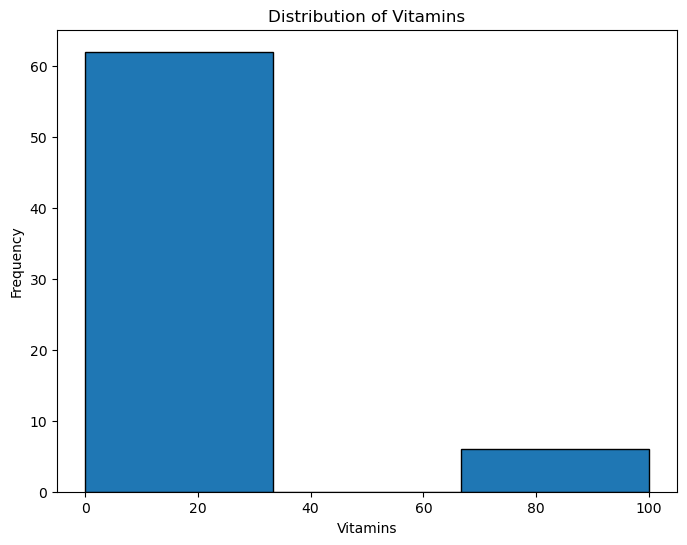

In [29]:
# visualization of the distribution of vitamins
plt.figure(figsize=(8, 6))
plt.hist(df['vitamins'], bins=3, edgecolor='black')
plt.xlabel('Vitamins')
plt.ylabel('Frequency')
plt.title('Distribution of Vitamins')
plt.show()

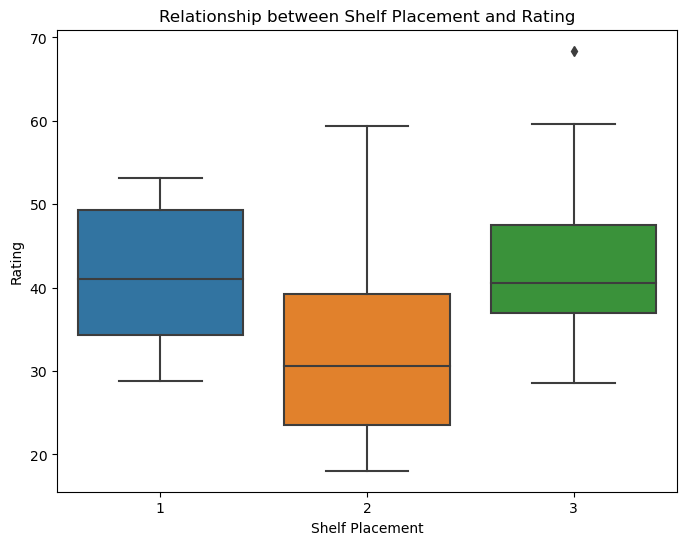

In [30]:
# box plot of rating by shelf placement
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='shelf', y='rating')
plt.xlabel('Shelf Placement')
plt.ylabel('Rating')
plt.title('Relationship between Shelf Placement and Rating')
plt.show()

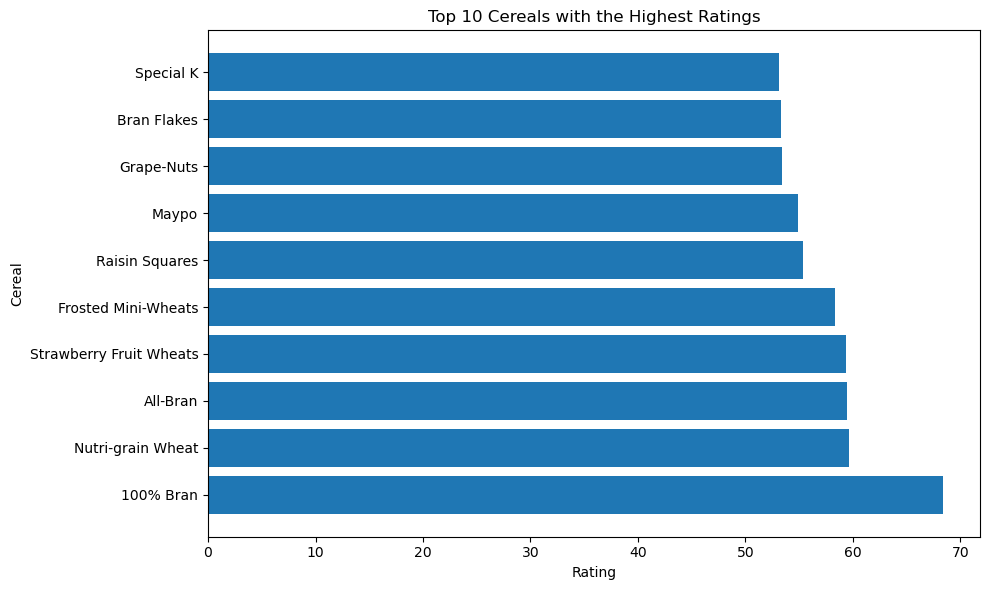

In [33]:
# Create a horizontal bar chart representing Top 10 cereals
top_10_cereals = df.nlargest(10,'rating')

plt.figure(figsize=(10, 6))
plt.barh(top_10_cereals['name'], top_10_cereals['rating'])
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Top 10 Cereals with the Highest Ratings')
plt.tight_layout()
plt.show()

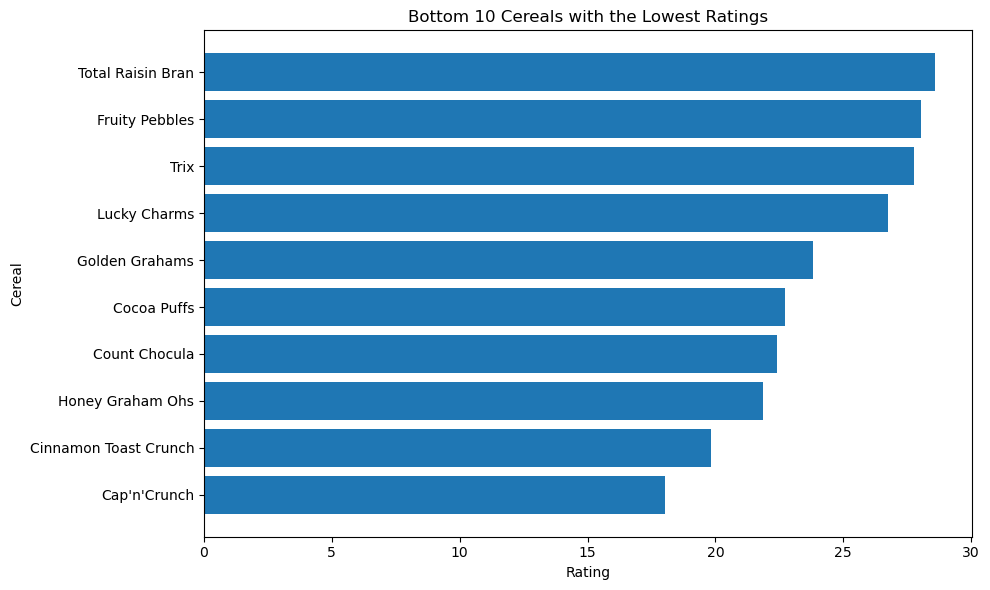

In [34]:
# Create a horizontal bar chart representing Bottom 10 cereals
bottom_10_cereals = df.nsmallest(10, 'rating')

plt.figure(figsize=(10, 6))
plt.barh(bottom_10_cereals['name'], bottom_10_cereals['rating'])
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Bottom 10 Cereals with the Lowest Ratings')
plt.tight_layout()
plt.show()

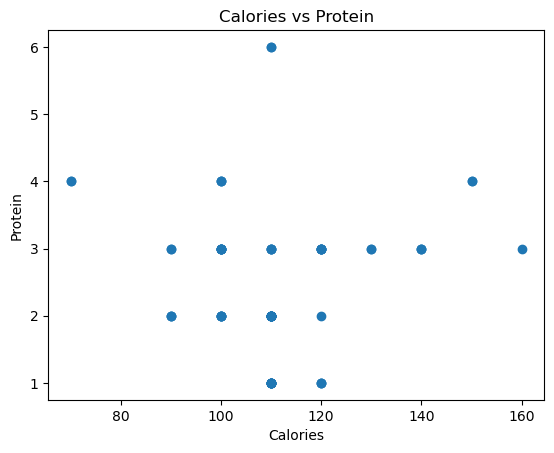

In [35]:
# Scatter plot: Calories vs Protein
plt.scatter(df['calories'], df['protein'])
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Calories vs Protein')
plt.show()

<Figure size 1200x600 with 0 Axes>

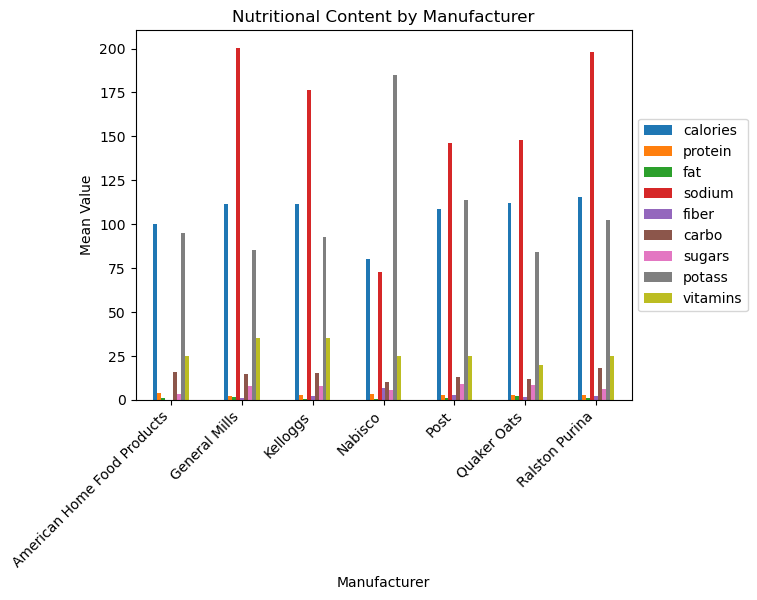

In [36]:
# Grouped bar plot: Nutritional content by Manufacturer
nutritional_factors = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
manufacturer_labels = ['American Home Food Products', 'General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats', 'Ralston Purina']

# Calculate the mean values for each nutritional factor and manufacturer
mean_values = df.groupby('mfr')[nutritional_factors].mean()

# Create the grouped bar plot
plt.figure(figsize=(12, 6))
ax = mean_values.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Value')
plt.title('Nutritional Content by Manufacturer')
ax.legend(nutritional_factors, loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend to the right
plt.xticks(range(len(manufacturer_labels)), manufacturer_labels, rotation='horizontal')
plt.xticks(rotation=45, ha='right')
plt.show()

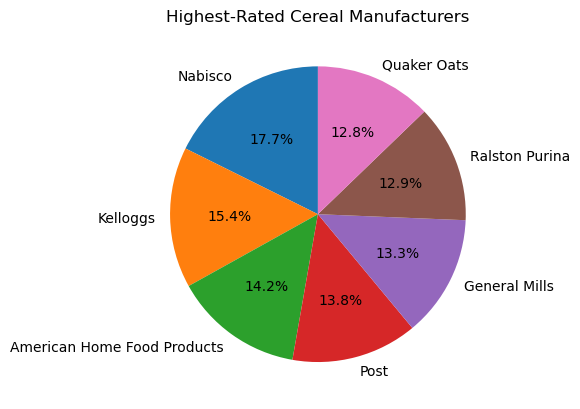

In [43]:
# Get the highest-rated cereals by manufacturer
highest_rating = df.groupby('mfr')['rating'].max().reset_index()

# Sort the data by rating in descending order
highest_rating = highest_rating.sort_values('rating', ascending=False)

# Get the manufacturer names and corresponding ratings
manufacturers = highest_rating['mfr'].tolist()
ratings = highest_rating['rating'].tolist()

# Create a pie chart
plt.pie(ratings, labels=manufacturers, autopct='%1.1f%%', startangle=90)

plt.title('Highest-Rated Cereal Manufacturers')

plt.show()

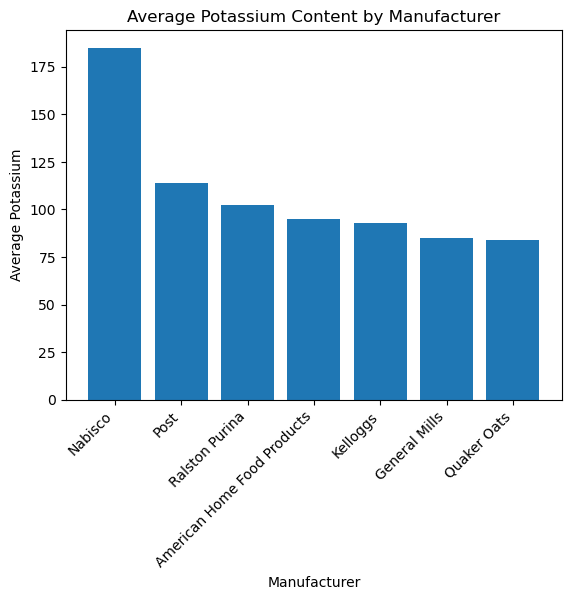

In [44]:
# Calculate the average potassium for each manufacturer
avg_potassium = df.groupby('mfr')['potass'].mean().reset_index()

# Sort the data by potassium in descending order
avg_potassium = avg_potassium.sort_values('potass', ascending=False)

# Plot the average potassium values
plt.bar(avg_potassium['mfr'], avg_potassium['potass'])

# Add labels and title
plt.xlabel('Manufacturer')
plt.ylabel('Average Potassium')
plt.title('Average Potassium Content by Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.show()